# MetaParameters (Activations & Optimizers)

- **Parameters:** Features of the model that are learned by the algorithm (mainly, the weights between modes). You do not set the parameters.

- **Metaparameters:** Features of the model that are set by you, not learned automatically by the model.

![Metaparameters List](./images/image-1.png)

- It is simply impossible to search the entire metaparameters space.
- It is difficult to know whether you are using the "best" model for your problem.
- Fortunately, parametric experiments on some metapameters are feasible.
- Ultimately, you must use a combination of experience, intution, previous successes, and empirical exploration.

## The `Wine Quality` Dataset:

**Code:**
- [Part 1 - Analysis Wine Dataset](https://github.com/Sayan-Roy-729/Data-Science/blob/main/Deep%20Learning/Using%20Pytorch/Part%206%20-%20Metaparameters%20(Activations%2C%20Optimizers)/Part%201%20-%20Analysis%20Wine%20Dataset.ipynb)
- [Part 2 - MiniBatch Size in the Wine Dataset](https://github.com/Sayan-Roy-729/Data-Science/blob/main/Deep%20Learning/Using%20Pytorch/Part%206%20-%20Metaparameters%20(Activations%2C%20Optimizers)/Part%202%20-%20MiniBatch%20Size%20in%20the%20Wine%20Dataset.ipynb)

## Data Normalization:

![Data Normalization](./images/image-2.png)
![Data Normalization](./images/image-3.png)

**The main points (Data normalization helps ensure that):**
- All samples are processed the same.
- All data features are treated the same.
- Weights remain numerically stable.

### Z-Transform

$$z_i = \frac{x_i - \bar{x}}{\sigma_x}$$

- **Mean center:** Subtract the average from each individual value.
- **Variance-normalize:** Divide by the standard deviation.
- The units are standard deviations away from the mean of the distribution
- Z-transform shifts and stretches, but doesn't change shape.

### MinMax Scaling

$$\tilde{x} = \frac{x - min(x)}{max(x) - min(x)}$$

- Scale to range of 0 to 1
- Scale to a range of $a$ to $b$. $x^* = a + \tilde{x}(b-a)$

![Normal Distribution](./images/image-4.png)

**Code:**
- Use previous Regularization iris notebooks by modifying

## Batch Normalization
**Normalize the input... which input?**
- Activation distribution characteristics (mean, variance) can shift as they pass through the layers.
- This can lead to covariance shifts, or to vanishing or exploding gradients.
- Solution: Normalize inputs to each layer.
- Even better: Learn mean/variance parameters for the normalization.

>$$y = \sigma(\tilde{X}^TW) \text{ where } \tilde{X} \text{ is normalized input}$$

>$$\tilde{X} = \gamma{X} + \beta \text{ where } X \text{ is Raw input }$$

- **Implementation note: BatchNorm goes before the activation function.**
- Batch normalization should only be applied during training.
- It should be switched off during validation/test, because batch size could differ (e.g., N=1). Instead, the model applies the learned parameters from training.
- PyTorch does this for you with `net.eval()`.
- Batch normalization applies to the inputs to each layer, not to the minibatches (although it is computed per minibatch)
- Normalization is mostly useful for deep networks or datasets with low accuracy.
- Acts as a regularizer, because the input distributions are shifted and stabilized.

**Code:**
- [Part 3 - Batch Normalization](https://github.com/Sayan-Roy-729/Data-Science/blob/main/Deep%20Learning/Using%20Pytorch/Part%206%20-%20Metaparameters%20(Activations%2C%20Optimizers)/Part%203%20-%20Batch%20Normalization.ipynb)

## Activation Functions

**Reminder:** All DL models (no matter how deep) with linear activation functions are simply 1-layer regression models.

![Desired qualities in an activation function](./images/image-5.png)

![Different Activation Functions](./images/image-6.png)

![ReLU variants](./images/image-7.png)

>**Comprehensive list of activation functions in neural networks with pros/cons [Click here](https://stats.stackexchange.com/questions/115258/comprehensive-list-of-activation-functions-in-neural-networks-with-pros-cons)**

>**How to pick an activation function?**
- Start with commonly used functions (ReLU & Sigmoid)
- Experiment with other functions if performance is low.
- Use only train/dev sets! Don't compare activation functions in the test set.
- Keep in mind that some activation functions are developed for academic purposes and may not have been rigorously tested in a variety architectures.

>**Code:**
- [Part 4 - Activation Functions](https://github.com/Sayan-Roy-729/Data-Science/blob/main/Deep%20Learning/Using%20Pytorch/Part%206%20-%20Metaparameters%20(Activations%2C%20Optimizers)/Part%204%20-%20Activation%20Functions.ipynb)
- [Part 5 - Activation Functions Comparison](https://github.com/Sayan-Roy-729/Data-Science/blob/main/Deep%20Learning/Using%20Pytorch/Part%206%20-%20Metaparameters%20(Activations%2C%20Optimizers)/Part%205%20-%20Activation%20Functions%20Comparison.ipynb)
- [Part 6 - CodeChallenge Compare ReLU Variants](https://github.com/Sayan-Roy-729/Data-Science/blob/main/Deep%20Learning/Using%20Pytorch/Part%206%20-%20Metaparameters%20(Activations%2C%20Optimizers)/Part%206%20-%20CodeChallenge%20Compare%20ReLU%20Variants.ipynb)
- [Part 7 - CodeChallenge Predict Sugar](https://github.com/Sayan-Roy-729/Data-Science/blob/main/Deep%20Learning/Using%20Pytorch/Part%206%20-%20Metaparameters%20(Activations%2C%20Optimizers)/Part%207%20-%20CodeChallenge%20Predict%20Sugar.ipynb)

## Loss Functions

![MSE & Cross Entropy](./images/image-8.png)

![(Binary) Cross Entropy](./images/image-9.png)

![Binary vs Multi Class Cross Entropy](./images/image-10.png)

![KL Distance Loss Function](./images/image-11.png)

> **Output layer architectures:**
- `Predict continuous data`:
    - Output layer has one unit with linear activation function
    - MSE loss function
- `Binary classification`:
    - Output layer has one unit with sigmoid activation function.
    - Cross-entropy (BCE) loss function.
- `Multiclass (N-way) classification`:
    - Output layer has N units with softmax activation functions.
    - Cross-entropy (CCE) loss function
    
> **Sigmoid vs Softmax**
- Why softmax for multiclass classification:
    - Softmax for two categories equals sigmoid. $\sigma = \frac{e^z}{\sum e^{z_i}}$
    - Using sigmoid for multiclass categorization doesn't create a probability distribution.
    - Sigmoid rewards correct responses; softmax also penalizes incorrect responses.
    
> **Softmax vs log-softmax**
- Log-Softmax: Compute softmax then take $log(p)$
- Log-softmax increase the sensitivity at small probabilities.
- Log-softmax gives a stronger penalty for error.

> **Code:**
- [Part 8 - Loss Functions](https://github.com/Sayan-Roy-729/Data-Science/blob/main/Deep%20Learning/Using%20Pytorch/Part%206%20-%20Metaparameters%20(Activations%2C%20Optimizers)/Part%208%20-%20Loss%20Functions.ipynb)
- [Part 9 - Multioutput ANN](https://github.com/Sayan-Roy-729/Data-Science/blob/main/Deep%20Learning/Using%20Pytorch/Part%206%20-%20Metaparameters%20(Activations%2C%20Optimizers)/Part%209%20-%20Multioutput%20ANN.ipynb)

## Optimizers (MiniBatch, Momemtum)

![Purpose of Optimizers](./images/image-12.png)

>**Stochastic Gradient Descent:**
$$w ← w - \eta{dL}$$
- Change the weights after each sample. This is great when all samples are similar to each other.
- But SGD learning is very sensitive and can lead to volatile changes based on non-representative samples.

>**SGD on mini-batches**
- Change the weights after N samples. Average losses across the N samples.
- Sometimes more robust than SGD, except when samples are similar to each other.

![What is momentum](./images/image-13.png)

![SGD with momentum](./images/image-14.png)

![Why do they call it momentum?](./images/image-15.png)

>**Code:**
- [Part 10 - SGD with Momentum](https://github.com/Sayan-Roy-729/Data-Science/blob/main/Deep%20Learning/Using%20Pytorch/Part%206%20-%20Metaparameters%20(Activations%2C%20Optimizers)/Part%2010%20-%20SGD%20with%20Momentum.ipynb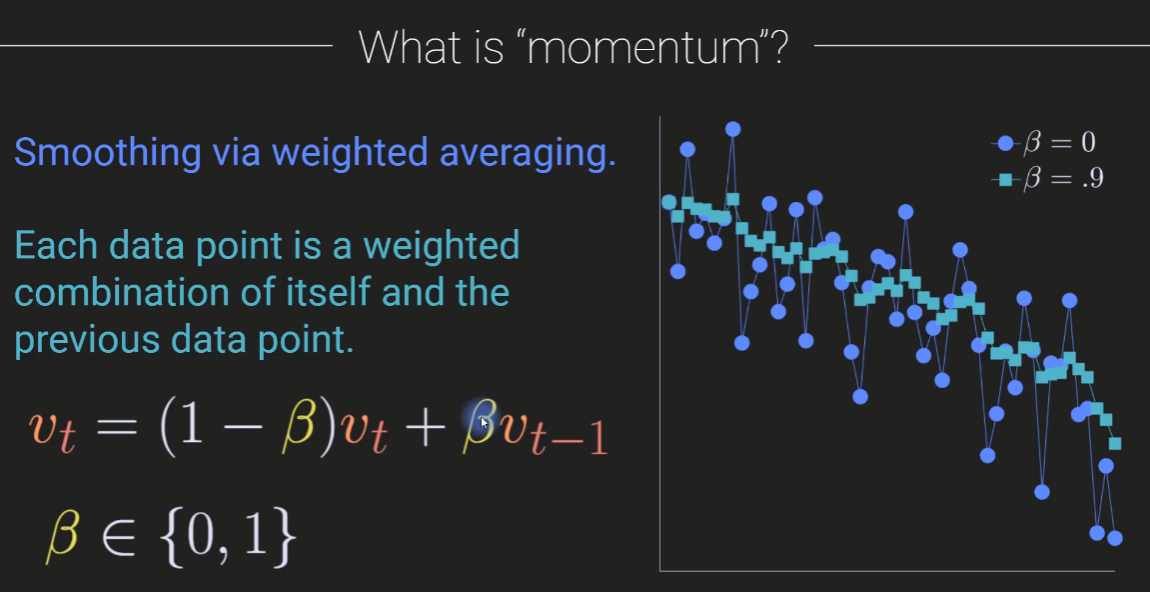)

## Optimizers (RMSProp, Adam):

### RMSprop

- RMS = root-mean-square (prop = propagation)
- Similar concept as momentum: Bias the weight changes using dampened previous gradients.
- RMSprop solution: Instead of biasing the gradient, bias the learning rate according to the magnitude of the gradient.

$$rms = \sqrt{\frac{1}{n}\sum_{i=1}^{n}x_i^2}$$

$$std = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(x_i - \bar{x})^2}$$

![RMSprop](./images/image-16.png)

![RMSprop](./images/image-17.png)

### Adam

- **Adam (non-DL):** Male name (convenient for alphabetical order)
- **Adam (DL):** Adaptive momentum
- **A'Dam:** Amsterdam (Dutch city)

**Combine momentum and RMSprop.**

![Adam Math](./images/image-18.png)

**Recommended parameter settings:**
- $\eta = 0.001$
- $\beta_1 = 0.9$
- $\beta_2 = 0.999$
- $\epsilon = 10^{-8}$ (1E-8)

**Bias correction factor**

$$\tilde{v} = \frac{v}{1-\beta_1^t}$$

$$\tilde{s} = \frac{s}{1 - \beta_2^t}$$

**where $t$ is the corresponding current training epoch.**

**Optimizers galore!**
- There are several other optimizers that have been propesed and tested.
- Adam is generally considered the current best, so you can use it without losing sleep.
- But SGD may work better for smaller-scale models/datasets.
- DL is a developing field; Adam may someday be replaced by something better and faster.

**Code:**
- [Part 11 - Optimizers Comparison](https://github.com/Sayan-Roy-729/Data-Science/blob/main/Deep%20Learning/Using%20Pytorch/Part%206%20-%20Metaparameters%20(Activations%2C%20Optimizers)/Part%2011%20-%20Optimizers%20Comparison.ipynb)
- [Part 12 - CodeChallenge Optimizers & Learning Rate](https://github.com/Sayan-Roy-729/Data-Science/blob/main/Deep%20Learning/Using%20Pytorch/Part%206%20-%20Metaparameters%20(Activations%2C%20Optimizers)/Part%2012%20-%20CodeChallenge%20Optimizers%20%26%20Learning%20Rate.ipynb)
- [Part 13 - CodeChallenge Adam with L2 Regularization](https://github.com/Sayan-Roy-729/Data-Science/blob/main/Deep%20Learning/Using%20Pytorch/Part%206%20-%20Metaparameters%20(Activations%2C%20Optimizers)/Part%2013%20-%20CodeChallenge%20Adam%20with%20L2%20Regularization.ipynb)


## Learning Rate Decay

- A dynamic learning rate can speed up learning.

**Code:**
- [Part 14 - Learning Rate Decay](https://github.com/Sayan-Roy-729/Data-Science/blob/main/Deep%20Learning/Using%20Pytorch/Part%206%20-%20Metaparameters%20(Activations%2C%20Optimizers)/Part%2014%20-%20Learning%20Rate%20Decay.ipynb)

## How To Pick Right Metaparameters

**So, how do you pick metaparameters?**
- Most important: Do what others have done (with similar architecure, data, problem, etc)
- Use knowledge that you've built up from experience (that's why we test many models and code challenges)
- Random search is usually more fruitful than grid-search.
- Try to balance laziness and diligence.

**Code:**
- 